In [1]:
import tensorflow as tf

In [3]:
# MNIST dataset of handwritten digits
from keras.datasets import mnist

# Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import RMSprop

# Preprocessing
from keras.utils import to_categorical

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

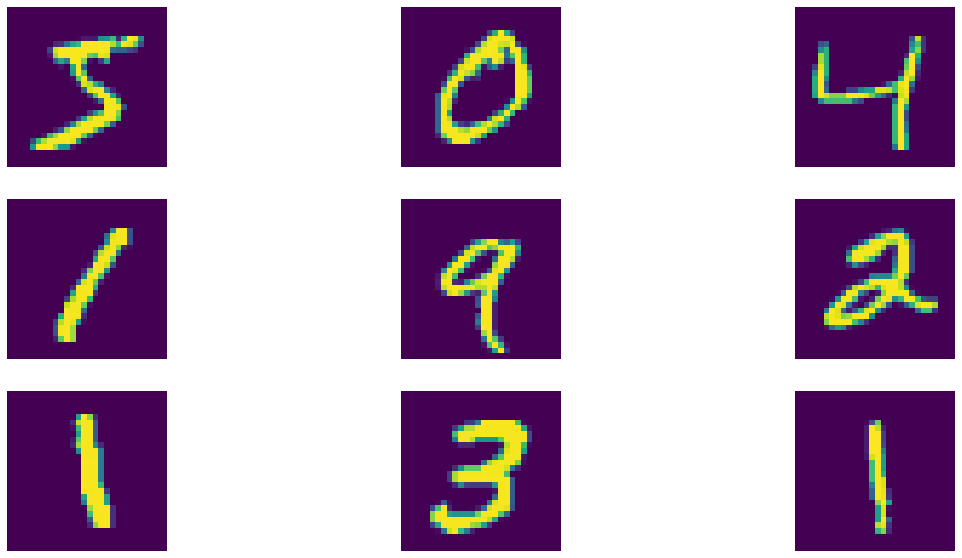

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flat

for i in range(9):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')

In [6]:
X_train = X_train.reshape((60000,28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
def get_model():
    model = Sequential()
    
    model.add(Conv2D(64, 
                     kernel_size=(3, 3), 
                     activation='relu', 
                     input_shape=(28, 28, 1)))
    
    model.add(Conv2D(128, 
                     (3,3), 
                     activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(1024, 
                    activation='relu'))
    
    model.add(Dropout(0.2))

    model.add(Dense(1024, 
                    activation='relu'))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(10, 
                    activation='softmax'))
    
    model.compile(optimizer=RMSprop(lr=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [9]:
model = get_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              18875392  
                                                      

In [10]:
history = model.fit(X_train[:5000],
                    y_train[:5000],
                    epochs=5,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/5
79/79 [==============================] - 79s 991ms/step - loss: 136.4429 - accuracy: 0.7100 - val_loss: 0.3602 - val_accuracy: 0.9031
Epoch 2/5
79/79 [==============================] - 81s 1s/step - loss: 0.4288 - accuracy: 0.8904 - val_loss: 5.9254 - val_accuracy: 0.2742
Epoch 3/5
79/79 [==============================] - 82s 1s/step - loss: 0.4070 - accuracy: 0.9176 - val_loss: 0.7823 - val_accuracy: 0.8298
Epoch 4/5
79/79 [==============================] - 77s 984ms/step - loss: 0.2765 - accuracy: 0.9402 - val_loss: 0.6845 - val_accuracy: 0.8780
Epoch 5/5
79/79 [==============================] - 77s 981ms/step - loss: 0.2473 - accuracy: 0.9466 - val_loss: 0.2127 - val_accuracy: 0.9525


In [17]:
model.save('educated.h5')

In [18]:
filehistory = tf.keras.models.load_model('educated.h5')

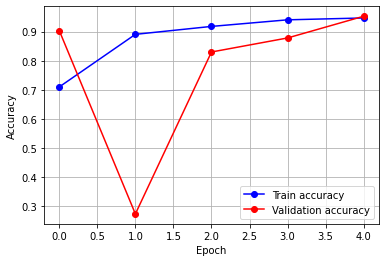

In [23]:
x = range(5)

plt.grid(True)

plt.plot(x, 
         history.history['accuracy'], 
         'bo-', 
         label='Train accuracy')

plt.plot(x, 
         history.history['val_accuracy'],
         'ro-',
         label='Validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

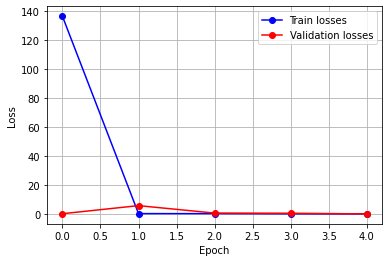

In [24]:
plt.grid(True)

plt.plot(x, 
         history.history['loss'], 
         'bo-', 
         label='Train losses')

plt.plot(x, 
         history.history['val_loss'],
         'ro-',
         label='Validation losses')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')

In [28]:
import keras
import numpy as np

def cnn_digits_predict(model, image_file):
   image_size = 28
   img = keras.utils.load_img(image_file, 
target_size=(image_size, image_size), color_mode='grayscale')
   img_arr = np.expand_dims(img, axis=0)
   #img_arr = 1 - img_arr/255.0
   img_arr = img_arr.reshape((1, 28, 28, 1))

   result = model.predict([img_arr])
   return result[0]

In [78]:
print(cnn_digits_predict(model, 'test0.png'))
print(np.argmax(cnn_digits_predict(model, 'test0.png')))

print(cnn_digits_predict(model, 'test1.png'))
print(np.argmax(cnn_digits_predict(model, 'test1.png')))

print(cnn_digits_predict(model, 'test2.png'))
print(np.argmax(cnn_digits_predict(model, 'test2.png')))

print(cnn_digits_predict(model, 'test3.png'))
print(np.argmax(cnn_digits_predict(model, 'test3.png')))

print(cnn_digits_predict(model, 'test4.png'))
print(np.argmax(cnn_digits_predict(model, 'test4.png')))

print(cnn_digits_predict(model, 'test5.png'))
print(np.argmax(cnn_digits_predict(model, 'test5.png')))

print(cnn_digits_predict(model, 'test6.png'))
print(np.argmax(cnn_digits_predict(model, 'test6.png')))

print(cnn_digits_predict(model, 'test7.png'))
print(np.argmax(cnn_digits_predict(model, 'test7.png')))

print(cnn_digits_predict(model, 'test8.png'))
print(np.argmax(cnn_digits_predict(model, 'test8.png')))

print(cnn_digits_predict(model, 'test9.png'))
print(np.argmax(cnn_digits_predict(model, 'test9.png')))

1/1 [==============================] - 0s 27ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1/1 [==============================] - 0s 25ms/step
8
1/1 [==============================] - 0s 27ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 34ms/step
1
1/1 [==============================] - 0s 27ms/step
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 36ms/step
2
1/1 [==============================] - 0s 26ms/step
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 26ms/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 27ms/step
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 [==============================] - 0s 29ms/step
5
1/1 [==============================] - 0s 27ms/step
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1/1 [==============================] - 0s 26ms/step
6
1/1 [=============================